In [121]:
# Running with python 3.6
# source activate py36

# sys.executable
import os
import sys
import time
import pandas as pd
import datetime
#import pandas.io.data as web
from pandas_datareader import data
import matplotlib.pyplot as plt
from matplotlib import style

# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.

from bs4 import BeautifulSoup
import requests
import pandas as pd

def get_SP500_stocks():
    url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies#S.26P_500_Component_Stocks"
    r = requests.get(url)
    data = r.text
    soup = BeautifulSoup(data, "html5lib")

    table = soup.find_all('table')[0]
    # Exclude header row
    rows = table.find_all('tr')[1:]
    #print(len(rows))
    #print(rows[len(rows)-1])
    stocks = []
    for row in rows:
        cols = row.find_all('td')
        stocks.append(cols[0].get_text())

    return stocks


def get_tickers(tickers, 
                data_source='yahoo', 
                start_date= '2000-01-01', 
                end_date=datetime.datetime.today().strftime('%Y-%m-%d')):

    # User pandas_reader.data.DataReader to load the desired data. As simple as that.
    panel_data = data.DataReader(tickers, data_source, start_date, end_date)
    #print(list(panel_data))
    #print(panel_data['Close'])


    # Getting just the adjusted closing prices. This will return a Pandas DataFrame
    # The index in this DataFrame is the major index of the panel_data.
    close = panel_data.ix['Adj Close']

    # Getting all weekdays between 01/01/2000 and 12/31/2016
    all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

    # How do we align the existing prices in adj_close with our new set of dates?
    # All we need to do is reindex close using all_weekdays as the new index
    close = close.reindex(all_weekdays)
    return close

def get_csv_file(ticker, base_dir='../data'):
    return os.path.join(base_dir, "{}.csv".format(str(ticker)))

def dump_tickers(tickers,
                base_dir='../data',
                data_source='yahoo', # google'
                start_date= '2000-01-01', 
                end_date=datetime.datetime.today().strftime('%Y-%m-%d')):

    for ticker in tickers:
        file = get_csv_file(ticker, base_dir)
        attempts = 0
        # Retry 3 times if there is exceptions with reading data
        while attempts < 3:
            try:
                ticker_data = data.DataReader(ticker, data_source, start_date, end_date)
                print("Processing", ticker)
                ticker_data.to_csv(file)
                break
            except:
                e = sys.exc_info()[0]
                print("Got", e, ". Retrying....")
                attempts += 1

# Read stocks from input file (config file)

sp500 = get_SP500_stocks() #
dump_tickers(sp500, base_dir="../data/sp500")


Processing KORS
Processing MCHP
Processing MU
Got <class 'pandas_datareader._utils.RemoteDataError'> . Retrying....
Processing MSFT
Processing MAA
Processing MHK
Processing TAP
Processing MDLZ
Processing MON
Processing MNST
Processing MCO
Processing MS
Processing MOS
Processing MSI
Processing MYL
Processing NDAQ
Processing NOV
Processing NAVI
Got <class 'pandas_datareader._utils.RemoteDataError'> . Retrying....
Processing NTAP
Got <class 'pandas_datareader._utils.RemoteDataError'> . Retrying....
Processing NFLX
Processing NWL
Processing NFX
Processing NEM
Processing NWSA
Processing NWS
Processing NEE
Processing NLSN
Processing NKE
Processing NI
Processing NBL
Processing JWN
Processing NSC
Processing NTRS
Processing NOC
Processing NRG
Processing NUE
Got <class 'pandas_datareader._utils.RemoteDataError'> . Retrying....
Processing NVDA
Processing ORLY
Processing OXY
Processing OMC
Processing OKE
Got <class 'pandas_datareader._utils.RemoteDataError'> . Retrying....
Processing ORCL
Processi

In [ ]:
def plot(data, title):
    plt.style.use('ggplot')
    plt.rcParams["figure.figsize"] = [16,9]

    plt.figure()  
    data.plot(title=title)
    plt.show()

    plt.figure()
    # Pct change for 30 days
    data.pct_change(30).plot(title='Pct change for 30 days')
    plt.show()
    
import time

def calculateRunTime(function, *args):
    """run a function and return the run time and the result of the function
    if the function requires arguments, those can be passed in too
    """
    startTime = time.time()
    result = function(*args)
    return time.time() - startTime, result

stocks=['AAPL', 'CLDR', 'FB', 'NVDA', 'AMD', 'NDAQ']
#dump_tickers(stocks)

data1 = get_tickers(tickers=stocks) #, #'MSFT', 'FB',
data2 = get_tickers(tickers=['VTXVX', # Vanguard Target Retirement 2015 Inv
                            'VTWNX', # Vanguard Target Retirement 2020
                            'VTTVX', # "Vanguard Target Retirement 2025 Inv
                            'VTTHX', #Vanguard Target Retirement 2035 Inv ()
                            'VTPSX', #VANG TOT INTL STK IP 
                            'VEMPX', # Vanguard Extended Market Index Fund Institutional Plus Shares
                            'VBMPX', #Vanguard Total Bond Market Index Fund Institutional Plus Shares
                            'DODFX' #DODGE & COX INTL STK ()'
                           ])
                  #start_date='2008-01-01',
                  #end_date='2010-01-01')
#print(data.tail())
#print(data.describe())


plot(data1, 'Stock prices')

csv_file = 'stocks.csv'
data1.to_csv(csv_file)

In [2]:
plot(data2, 'Mutual fund prices')

NameError: name 'data2' is not defined

In [22]:
'''
Slicing by rows
'''
# Only want subset of rows
dates = pd.date_range('2008-01-02','2008-01-10')
print(dates[len(dates)-1])
print(data1[dates[0] :dates[len(dates)-1]])

# Same as
print(data1.ix['2008-01-02':'2008-01-10'])

'''
Slicing by columns
'''
print(data1[['AAPL', 'AMD']].head())

'''
Slicing by rows and columns
'''
print(data1.ix['2008-01-02':'2008-01-10',['AAPL', 'AMD']])



2008-01-10 00:00:00
                 AAPL   AMD  CLDR  FB       NDAQ       NVDA
2008-01-02  25.041281  7.14   NaN NaN  44.032314  30.625036
2008-01-03  25.052847  6.77   NaN NaN  43.210651  30.383825
2008-01-04  23.140436  6.25   NaN NaN  40.754761  27.832512
2008-01-07  22.830696  6.08   NaN NaN  41.603832  24.956482
2008-01-08  22.009445  6.00   NaN NaN  39.732258  25.485296
2008-01-09  23.056898  5.53   NaN NaN  40.882587  26.802704
2008-01-10  22.879536  5.96   NaN NaN  42.014656  26.246054
                 AAPL   AMD  CLDR  FB       NDAQ       NVDA
2008-01-02  25.041281  7.14   NaN NaN  44.032314  30.625036
2008-01-03  25.052847  6.77   NaN NaN  43.210651  30.383825
2008-01-04  23.140436  6.25   NaN NaN  40.754761  27.832512
2008-01-07  22.830696  6.08   NaN NaN  41.603832  24.956482
2008-01-08  22.009445  6.00   NaN NaN  39.732258  25.485296
2008-01-09  23.056898  5.53   NaN NaN  40.882587  26.802704
2008-01-10  22.879536  5.96   NaN NaN  42.014656  26.246054
                AAPL

                AAPL       AMD  CLDR        FB      NDAQ      NVDA
2013-01-02  1.000000  1.000000   NaN  1.000000  1.000000  1.000000
2013-01-03  0.987378  0.984190   NaN  0.991786  1.024068  1.000786
2013-01-04  0.959875  1.023715   NaN  1.027143  1.027950  1.033805
2013-01-07  0.954228  1.055336   NaN  1.050714  1.019798  1.003931
2013-01-08  0.956797  1.055336   NaN  1.037857  1.013199  0.981918


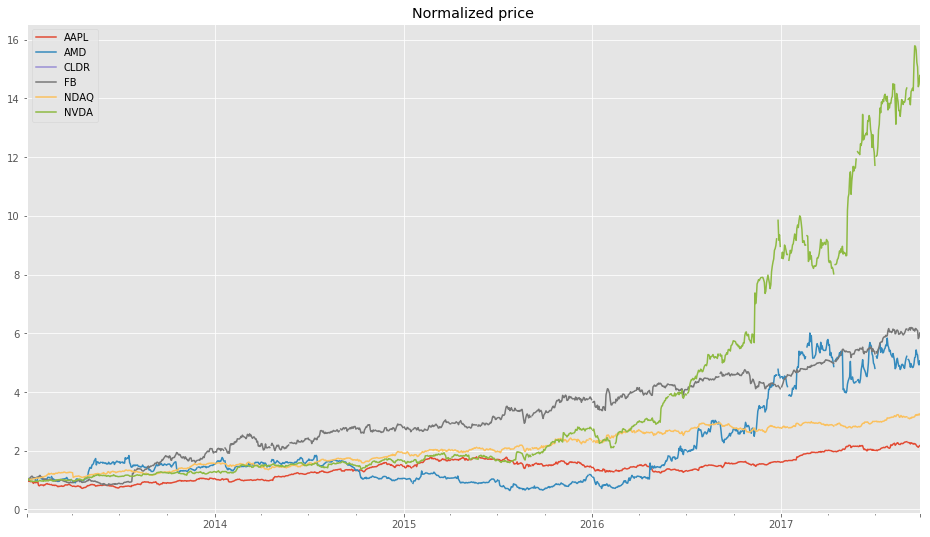

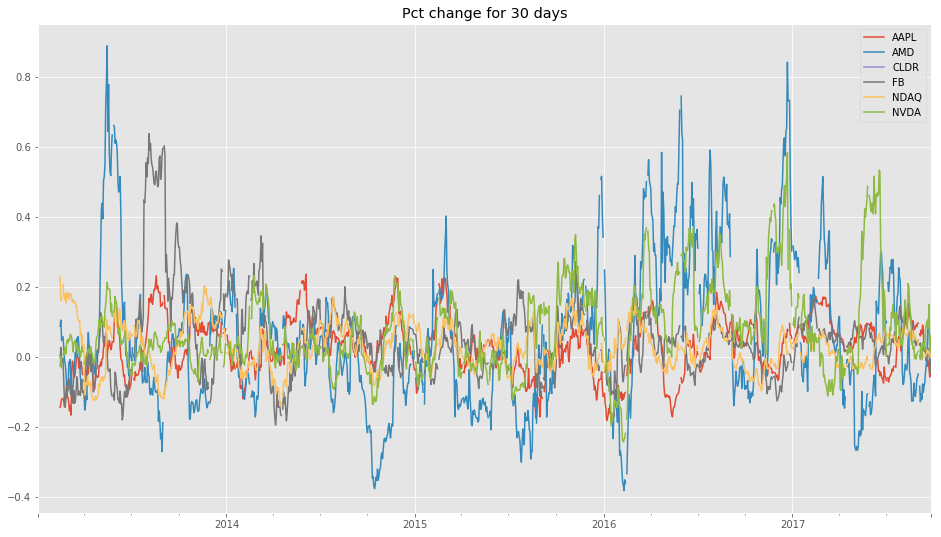

In [44]:
'''
Normalizing data: start all stocks at $1 by dividing the 1st stock values
'''
def normalize_data(df):
    return df/df.ix[0,:]

norm = normalize_data(pd.DataFrame(data1.ix['2013-01-02':'2018-01-01']))
print(norm.head())
plot(norm, 'Normalized price')

In [27]:

def load_csv_data(source_dir="data"):
    '''
    Read pickle files in data and load into dataframes
    '''
    for filename in os.listdir(source_dir):
        if filename.endswith(".csv"):
            ticker = filename.split('.')[0]
            #print(filename, ticker)

            df = pd.read_csv(os.path.join(source_dir,filename))
            print(ticker, df.head())


load_pickle_data()

AAPL                  Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2008-01-02  28.467142  28.608572  27.507143  27.834286  25.041281  269794700
2008-01-03  27.915714  28.198572  27.527143  27.847143  25.052847  210516600
2008-01-04  27.350000  27.571428  25.555714  25.721428  23.140436  363958000
2008-01-07  25.892857  26.228571  24.318571  25.377142  22.830696  518048300
2008-01-08  25.734285  26.065714  24.400000  24.464285  22.009445  380954000
AMD             Open  High   Low  Close  Adj Close    Volume
Date                                                    
2008-01-02  7.40  7.40  7.02   7.14       7.14  46057300
2008-01-03  7.15  7.18  6.75   6.77       6.77  34787400
2008-01-04  6.64  6.64  6.10   6.25       6.25  51476400
2008-01-07  6.37  6.41  6.02   6.08       6.08  32111500
2008-01-08  6.18  6.38  5.97   6.00       6.00  37271600
CLDR                  Open       High        Low     

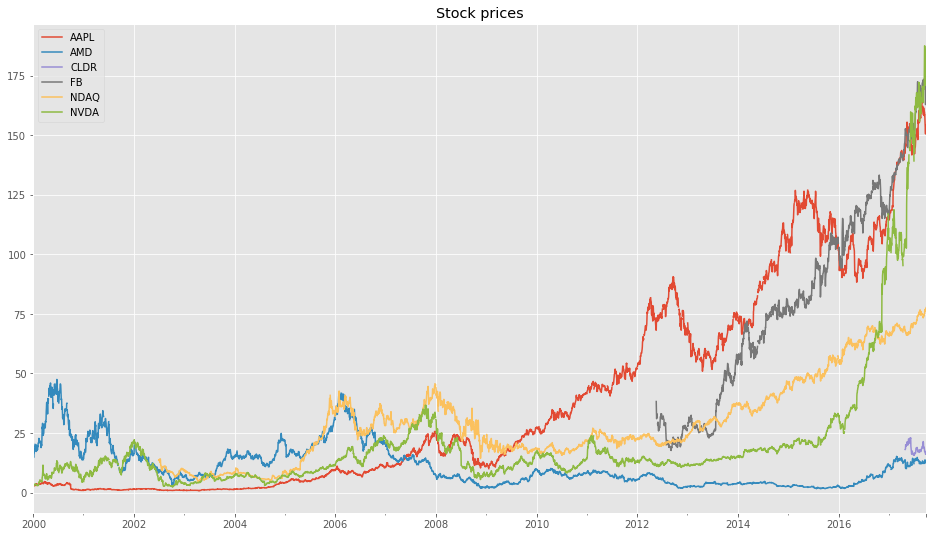

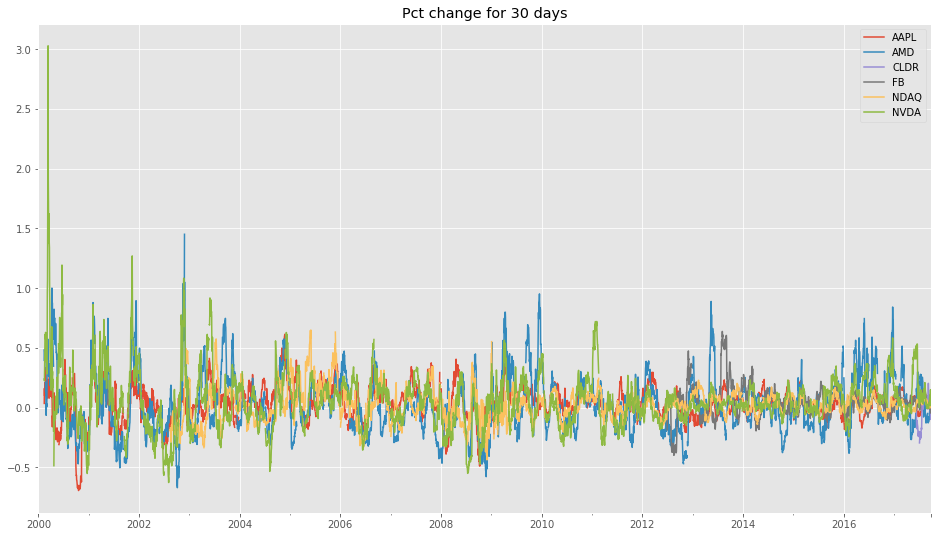

In [48]:
data = pd.read_pickle(pickle_file)
#data.fillna(method='ffill', inplace='TRUE')
#data.fillna(method='bfill', inplace='TRUE')

plot(data, "Stock prices")

See http://www.learndatasci.com/python-finance-part-2-intro-quantitative-trading-strategies/

In [25]:
# Log returns - First the logarithm of the prices is taken and the the difference of consecutive (log) observations
import numpy as np

log_returns = np.log(data1).diff()
log_returns.head()

,AAPL,AMD,CLDR,FB,NDAQ,NVDA
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.088078,-0.058108,NaN,NaN,NaN,-0.027065
2000-01-05,0.014528,0.025318,NaN,NaN,NaN,-0.033476
2000-01-06,-0.090514,0.064539,NaN,NaN,NaN,-0.067474
2000-01-07,0.046281,0.015504,NaN,NaN,NaN,0.016554


In [49]:
data1.head()

,AAPL,AMD,CLDR,FB,NDAQ,NVDA
2000-01-03,3.596616,15.500,NaN,NaN,NaN,3.619193
2000-01-04,3.293384,14.625,NaN,NaN,NaN,3.522552
2000-01-05,3.341579,15.000,NaN,NaN,NaN,3.406583
2000-01-06,3.052405,16.000,NaN,NaN,NaN,3.184309
2000-01-07,3.196992,16.250,NaN,NaN,NaN,3.237462


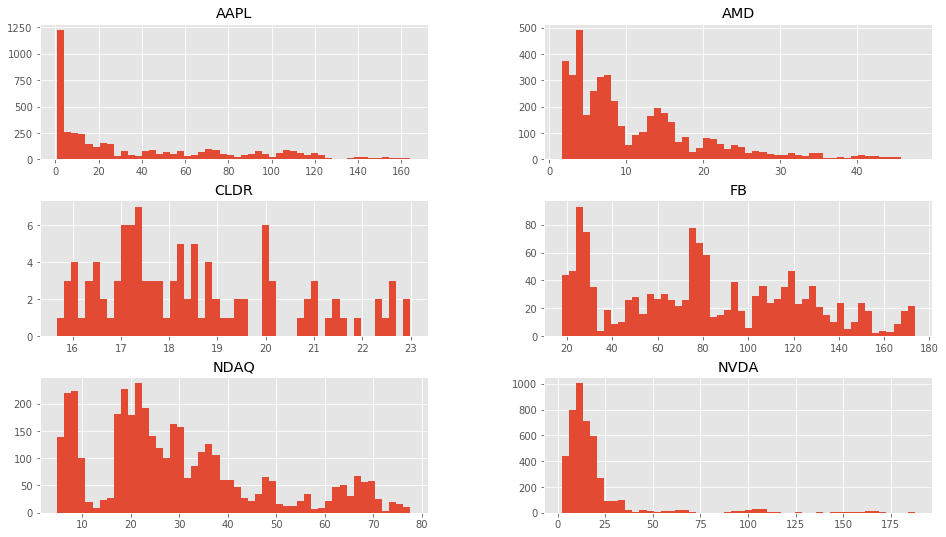

In [56]:
data.hist(bins=50)
plt.show()

In [ ]:
# Scatter plots


In [ ]:
fig = plt.figure(figsize=[16,9])

ax = fig.add_subplot(2,1,1)

for c in log_returns:
    ax.plot(log_returns.index, log_returns[c].cumsum(), label=str(c))

ax.set_ylabel('Cumulative log returns')
ax.legend(loc='best')
ax.grid()

ax = fig.add_subplot(2,1,2)

for c in log_returns:
    ax.plot(log_returns.index, 100*(np.exp(log_returns[c].cumsum()) - 1), label=str(c))

ax.set_ylabel('Total relative returns (%)')
ax.legend(loc='best')
ax.grid()

plt.show()


In [ ]:
# Last day returns. Make this a column vector
r_t = log_returns.tail(1).transpose()
r_t

In [ ]:
# Weights as defined above
print(len(r_t))

weights_vector = pd.DataFrame(1 / len(r_t), index=r_t.index, columns=r_t.columns)
weights_vector

In [ ]:
# Total log_return for the portfolio is:
portfolio_log_return = weights_vector.transpose().dot(r_t)
portfolio_log_return

In [ ]:
# Allocation percentage
weights_matrix = pd.DataFrame(0.0, index=data1.index, columns=data1.columns)
weights_matrix.loc[:, 'FB'] = 0.84
weights_matrix.loc[:, 'CLDR'] = 0.16
weights_matrix.tail()

In [ ]:
log_returns.head()

In [ ]:
# Initially the two matrices are multiplied. Note that we are only interested in the diagonal, 
# which is where the dates in the row-index and the column-index match.
temp_var = weights_matrix.dot(log_returns.transpose())
temp_var.tail().ix[:, 0:5]


In [ ]:

# The numpy np.diag function is used to extract the diagonal and then
# a Series is constructed using the time information from the log_returns index
portfolio_log_returns = pd.Series(np.diag(temp_var), index=log_returns.index)
portfolio_log_returns.tail()

In [ ]:
total_relative_returns = (np.exp(portfolio_log_returns.cumsum()) - 1)

fig = plt.figure(figsize=[16,9])
ax = fig.add_subplot(2, 1, 1)
ax.plot(portfolio_log_returns.index, portfolio_log_returns.cumsum())
ax.set_ylabel('Portfolio cumulative log returns')
ax.grid()
ax = fig.add_subplot(2, 1, 2)
ax.plot(total_relative_returns.index, 100 * total_relative_returns)
ax.set_ylabel('Portfolio total relative returns (%)')
ax.grid()
plt.show()

In [ ]:
# Calculating the time-related parameters of the simulation
days_per_year = 52 * 5
total_days_in_simulation = data.shape[0]
number_of_years = total_days_in_simulation / days_per_year

# The last data point will give us the total portfolio return
total_portfolio_return = total_relative_returns[-1]
# Average portfolio return assuming compunding of returns
average_yearly_return = (1 + total_portfolio_return)**(1 / number_of_years) - 1

print('Total portfolio return is: ' +
      '{:5.2f}'.format(100 * total_portfolio_return) + '%')
print('Average yearly return is: ' +
      '{:5.2f}'.format(100 * average_yearly_return) + '%')

In [ ]:
total_relative_returns

In [ ]:
print(number_of_years)

In [63]:
from urllib.request import urlopen

url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies#S.26P_500_Component_Stocks"
html = urlopen(url).read()
html


b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of S&amp;P 500 companies - Wikipedia</title>\n<script>document.documentElement.className = document.documentElement.className.replace( /(^|\\s)client-nojs(\\s|$)/, "$1client-js$2" );</script>\n<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_S\\u0026P_500_companies","wgTitle":"List of S\\u0026P 500 companies","wgCurRevisionId":801637797,"wgRevisionId":801637797,"wgArticleId":2676045,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","S\\u0026P Dow Jones Indices","Lists of companies","Standard \\u0026 Poor\'s"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],

505 ['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AMD', 'AAP', 'AES', 'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'ADM', 'ARNC', 'AJG', 'AIZ', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BCR', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BWA', 'BXP', 'BSX', 'BHF', 'BMY', 'AVGO', 'BF.B', 'CHRW', 'CA', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'CBOE', 'KMX', 'CCL', 'CAT', 'CBG', 'CBS', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CHK', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'COH', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'GLW', 'COST', 'COTY', 'CCI', 'CSRA', 'CS

## Using Yahoo Finance

In [37]:
from yahoo_finance import Share
from pprint import pprint

In [39]:
for stock in stocks:
    print(stock)
    data = Share(stock)
    #pprint(data.get_historical('2014-04-25', '2014-04-29'))


AAPL


YQLResponseMalformedError: Response malformed.

In [46]:
# pip install realtime-stock
from rtstock.stock import Stock
for stock in stocks:
    print(stock)
    data = Stock(stock)
    print(data.get_latest_price())


AAPL


HTTPError: HTTP Error 400: Bad Request